## 1.Business Understanding


Das Unternehmen, das in der Medizinbranche tätig ist, hat das Ziel, das Risiko für die Entwicklung einer koronaren Herzkrankheit (KHK) basierend auf verschiedenen demografischen, verhaltensbezogenen und medizinischen Faktoren zu bestimmen. Mit dieser Risikovorhersage können frühzeitige Maßnahmen ergriffen werden, um die Krankheit im besten Fall zu verhindern und die Gesundheit der Patienten langfristig zu verbessern.


## 2.Data Understanding


Das Unternehmen in der Medizinbranche strebt danach, das Risiko für die Entwicklung einer koronaren Herzkrankheit (KHK) basierend auf verschiedenen demografischen, verhaltensbezogenen und medizinischen Faktoren zu bestimmen. Diese Risikovorhersage ermöglicht es, frühzeitig Maßnahmen zu ergreifen, um die Krankheit im besten Fall zu verhindern und langfristig die Gesundheit der Patienten zu verbessern.



Der Code importiert Bibliotheken für Datenanalyse, numerische Berechnungen und Datenvisualisierung, und legt fest, dass Diagramme direkt in das Jupyter Notebook eingebettet werden, um eine Analyse zur Vorhersage des Risikos einer koronaren Herzkrankheit anhand der Zielvariable TenYearCHD durchzuführen.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Ziel: Vorhersage, ob der Patient ein Risiko hat an koronare Herzkrankheit zu erkranken. Zielvariable ist TenYearCHD.

Der Code importiert Bibliotheken für die Erstellung von Klassifikationsdatensätzen, das Aufteilen von Daten in Trainings- und Testsets, die Durchführung logistischer Regressionen, die Bewertung von Klassifikationsmodellen und das Ausbalancieren von Klassenverteilungen, um zu überprüfen, ob sklearn und imblearn kompatible Versionen haben.

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
#Check if sklearn and imblearn are in a compatible version

Der Code lädt einen Datensatz zur Risikoanalyse von Herzerkrankungen aus einer angegebenen URL in ein Pandas DataFrame.

In [6]:
train = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Risk_prediction_of_heart_disease_data.csv')
#Quelle: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

Die Tabelle zeigt verschiedene Merkmale von Patienten, wie Geschlecht, Alter, Bildungsniveau, Rauchgewohnheiten, Blutdruckmedikamente, Vorerkrankungen, Cholesterinwerte, Blutdruck, Body-Mass-Index, Herzfrequenz und Blutzuckerspiegel, sowie die Zielvariable, ob der Patient in den nächsten zehn Jahren eine koronare Herzkrankheit entwickelt hat.

In [7]:
train.to_csv('train.csv', index=False)
train.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

Die Tabelle liefert eine statistische Zusammenfassung (Anzahl, Mittelwert, Standardabweichung, Minimum, 25., 50. und 75. Perzentil sowie Maximum) verschiedener Merkmale von Patienten, darunter Geschlecht, Alter, Bildungsniveau, Rauchgewohnheiten, Medikamenteneinnahme, Vorerkrankungen, Cholesterinwerte, Blutdruck, Body-Mass-Index, Herzfrequenz, Blutzuckerspiegel und die zehnjährige Wahrscheinlichkeit, an einer koronaren Herzkrankheit zu erkranken.

In [8]:
train.describe(include='all')

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

Die Tabelle zeigt die Struktur eines DataFrames mit 4240 Einträgen und 16 Spalten, einschließlich der Spaltennamen, der Anzahl der nicht-leeren Werte, der Datentypen jeder Spalte und des gesamten Speicherbedarfs.

## 3.Datenvorbereitung

Dieser Prozess umfasst das Identifizieren und Behandeln fehlender Werte, die Bereinigung und Transformation der Daten sowie die Sicherstellung der Datenkonsistenz.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Die Tabelle zeigt für jede Zeile und Spalte, ob ein fehlender Wert vorhanden ist, wobei alle Werte "False" sind, was darauf hinweist, dass keine fehlenden Werte in den angegebenen Daten vorhanden sind.

In [10]:
train_missingValues = train.isna()
train_missingValues.head()

male    age  education  currentSmoker  cigsPerDay  BPMeds  \
0  False  False      False          False       False   False   
1  False  False      False          False       False   False   
2  False  False      False          False       False   False   
3  False  False      False          False       False   False   
4  False  False      False          False       False   False   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0            False         False     False    False  False  False  False   
1            False         False     False    False  False  False  False   
2            False         False     False    False  False  False  False   
3            False         False     False    False  False  False  False   
4            False         False     False    False  False  False  False   

   heartRate  glucose  TenYearCHD  
0      False    False       False  
1      False    False       False  
2      False    False       False  
3      False    False       False  
4      False    False       False

Die Tabelle zeigt die Anzahl der fehlenden Werte (NaN) für jede Spalte des DataFrames, wobei Spalten wie education, cigsPerDay, BPMeds, totChol, BMI, heartRate und glucose einige fehlende Werte aufweisen.


In [11]:
train_missingValues.sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

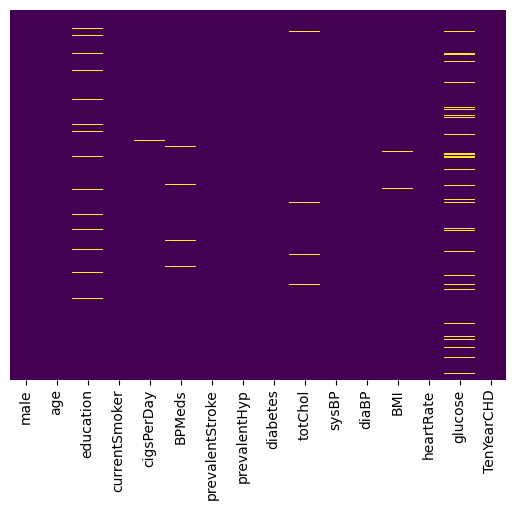

In [12]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')
# Die Daten zeigen, dass es nur wenige Zeilen gibt, die keinen Wert haben 

<Axes: >

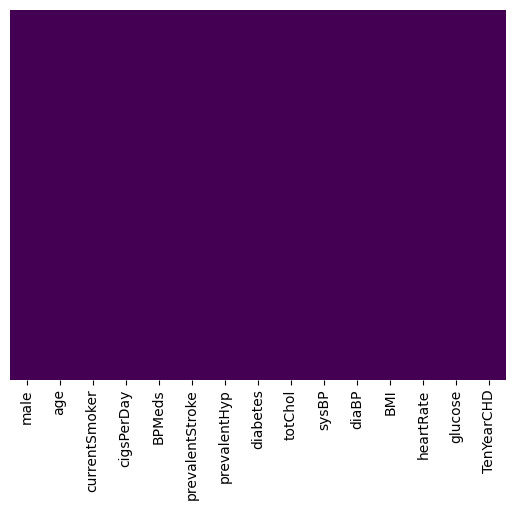

In [13]:
# Wir löschen alle Zeilen mit den fehlenden Werten und die Spalte die für die Auswertung nicht relevant ist oder nicht benötigt wird
train = train.drop('education', axis=1)
train = train.dropna(axis=0)
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [14]:
train[train.duplicated(keep=False)] #keine Duplikate vorhanden 

Empty DataFrame
Columns: [male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [15]:
###  Explorative Datenanalyse

In [16]:
train.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Der Code zeigt die Anzahl der Fälle (572) und Nicht-Fälle (3179) der Zielvariable "TenYearCHD" in einem Pandas Series-Objekt an.

In [17]:
train.TenYearCHD.value_counts()

TenYearCHD
0    3179
1     572
Name: count, dtype: int64

Der Code stellt ein Balkendiagramm dar, das die Verteilung der Zielvariable "TenYearCHD" im DataFrame "train" visualisiert, während das Design der Visualisierung auf "whitegrid" gesetzt wird.

<Axes: xlabel='TenYearCHD', ylabel='count'>

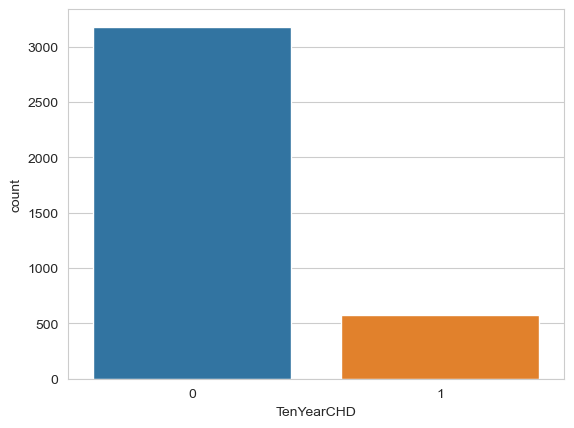

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', data=train)

Der Code importiert die Cufflinks-Bibliothek für interaktive Plotly-Diagramme, konfiguriert sie für die Offline-Nutzung und stellt sicher, dass die erstellten Diagramme für andere Benutzer sichtbar sind.


In [19]:
#import cufflinks as cf
#import plotly.offline
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

Der Code berechnet die Anzahl der Fälle und Nicht-Fälle der Zielvariable "TenYearCHD" für männliche und weibliche Patienten im DataFrame "train" und erstellt ein gestapeltes Balkendiagramm, um die Verteilung der Herzkrankheitsrisiken zwischen den Geschlechtern darzustellen, unter Verwendung der Cufflinks-Bibliothek und Plotly für interaktive Visualisierungen.

In [20]:
#TenYearCHD_male = train[train['male']==1]['TenYearCHD'].value_counts()
#TenYearCHD_female = train[train['male']==0]['TenYearCHD'].value_counts()
#df1 = pd.DataFrame([TenYearCHD_male,TenYearCHD_female])
#df1.index = ['Male','Female']
#df1.iplot(kind='bar',barmode='stack')

Der Code wandelt den DataFrame "train" in ein geschmolzenes Format um und erstellt dann eine Kreuztabelle, die die Anzahl der Fälle und Nicht-Fälle der Zielvariable "TenYearCHD" für jede Kategorie der Variable "male" (0 und 1) zeigt.



In [21]:
#df1 =train.melt(var_name='male', value_name='TenYearCHD')
#pd.crosstab(index=df1['TenYearCHD'], columns=df1['male'])

Der Code erstellt ein gruppiertes Balkendiagramm, das die Anzahl der Fälle und Nicht-Fälle der Zielvariable "TenYearCHD" nach Geschlecht im DataFrame "train" darstellt, wobei das Design auf "whitegrid" gesetzt ist.

<Axes: xlabel='TenYearCHD', ylabel='count'>

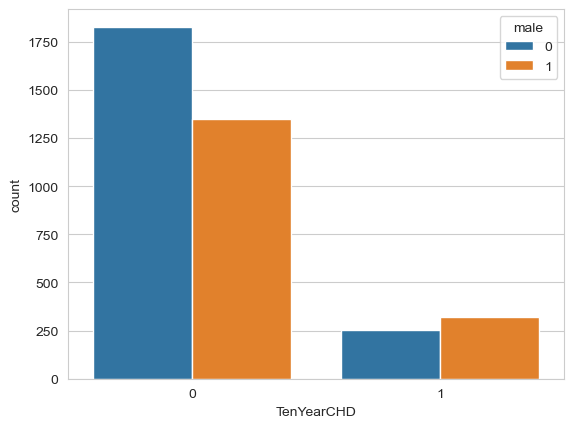

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', hue='male', data=train)
#  kein 10-Jahres Risiko und weiblich = 1828
#  kein 10 Jahres Risko und männlich = 1351
#  10-Jahres Risiko und weiblich = 253
#  10 Jahres Risko und männlich  = 319

Die Warnung besagt, dass die distplot Funktion in Seaborn veraltet ist und in zukünftigen Versionen durch displot oder histplot ersetzt werden sollte.

C:\Users\ar\AppData\Local\Temp\ipykernel_31200\3613199035.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['age'])


<Axes: xlabel='age', ylabel='Density'>

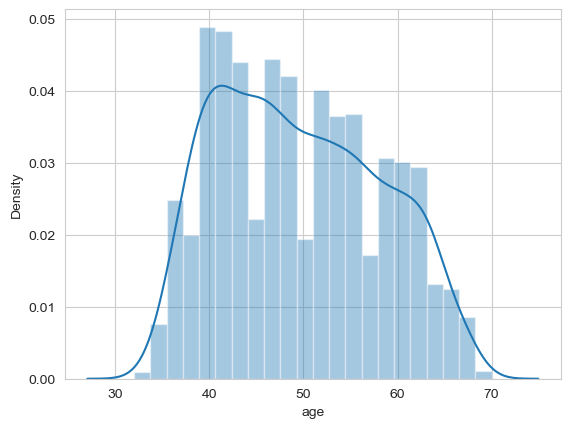

In [23]:
sns.distplot(train['age'])

Der Code erstellt ein Balkendiagramm, das die Häufigkeit der Zielvariable "TenYearCHD" für jede Altersgruppe im DataFrame "train" darstellt, wobei jede Balkenfarbe den jeweiligen Wert von "TenYearCHD" repräsentiert.

<Axes: xlabel='age', ylabel='count'>

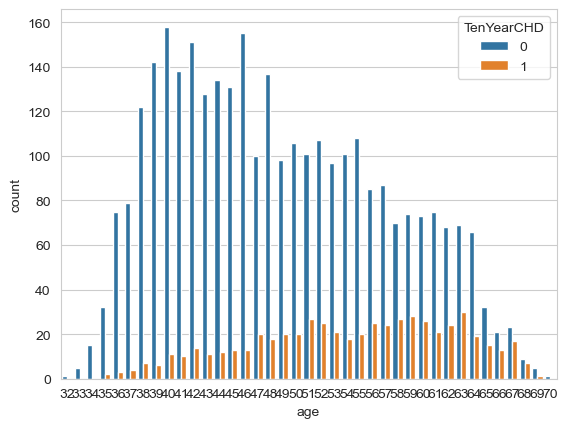

In [24]:
 sns.countplot(x=train['age'], hue=train['TenYearCHD'], data=train)

Der Code erstellt ein Balkendiagramm, das die Häufigkeit der Zielvariable "TenYearCHD" für verschiedene Werte der Variable "cigsPerDay" (Zigaretten pro Tag) im DataFrame "train" darstellt, wobei die Balken nach der Werte der Zielvariable "TenYearCHD" gefärbt sind.

<Axes: xlabel='count', ylabel='cigsPerDay'>

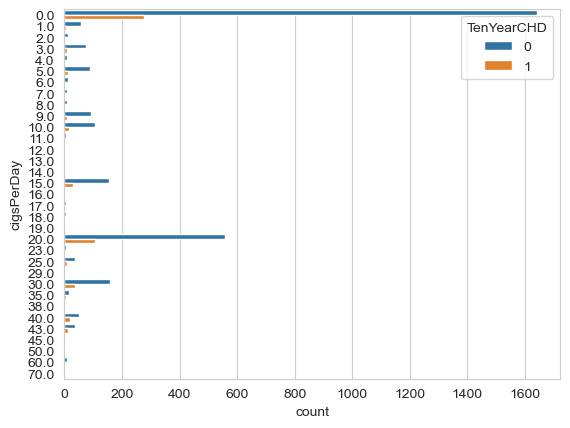

In [25]:
 sns.countplot(y=train['cigsPerDay'], hue=train['TenYearCHD'], data=train)

Der Code setzt das Design der Diagramme auf "whitegrid" und erstellt dann ein gruppiertes Balkendiagramm, das die Anzahl der Fälle und Nicht-Fälle der Zielvariable "TenYearCHD" nach Raucherstatus ("currentSmoker") im DataFrame "train" darstellt.

<Axes: xlabel='TenYearCHD', ylabel='count'>

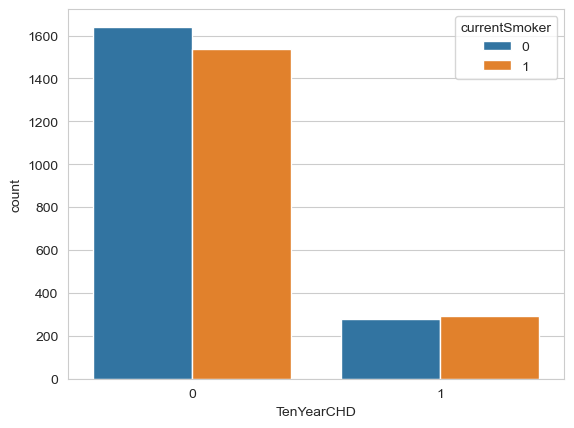

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', hue='currentSmoker', data=train)

Der Code setzt das Design der Diagramme auf "whitegrid" und erstellt ein gruppiertes Balkendiagramm, das die Anzahl der Fälle und Nicht-Fälle der Zielvariable "TenYearCHD" nach der Einnahme von Blutdruckmedikamenten ("BPMeds") im DataFrame "train" darstellt.

<Axes: xlabel='TenYearCHD', ylabel='count'>

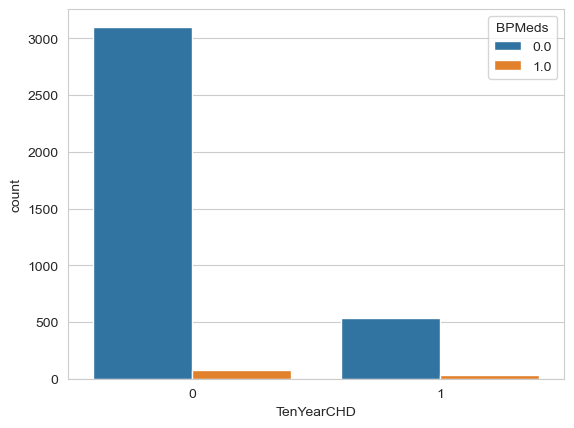

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', hue='BPMeds', data=train)

Der auskommentierte Code würde ein gruppiertes Balkendiagramm erstellen, das die Anzahl der Fälle und Nicht-Fälle der Zielvariable "TenYearCHD" nach dem Vorhandensein eines Schlaganfalls ("prevalentStroke") im DataFrame "train" darstellt, während das Design auf "whitegrid" gesetzt ist.

In [28]:
#sns.set_style('whitegrid')
#sns.countplot(x='TenYearCHD', hue='prevalentStroke', data=train)

Der Code setzt das Design der Diagramme auf "whitegrid" und erstellt ein gruppiertes Balkendiagramm, das die Anzahl der Fälle und Nicht-Fälle der Zielvariable "TenYearCHD" nach dem Vorhandensein von Bluthochdruck ("prevalentHyp") im DataFrame "train" darstellt.

<Axes: xlabel='TenYearCHD', ylabel='count'>

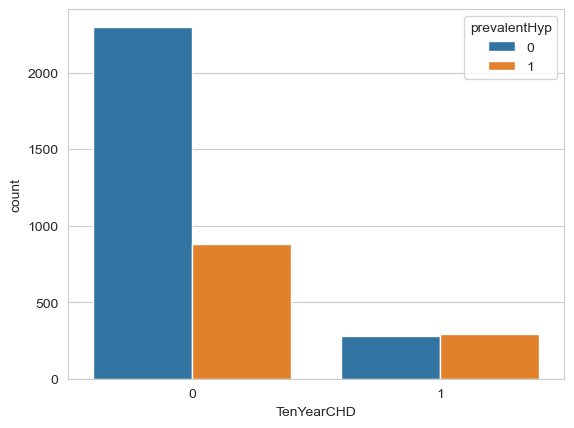

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', hue='prevalentHyp', data=train)

Der Code setzt das Design der Diagramme auf "whitegrid" und erstellt ein gruppiertes Balkendiagramm, das die Anzahl der Fälle und Nicht-Fälle der Zielvariable "TenYearCHD" nach dem Vorhandensein von Diabetes ("diabetes") im DataFrame "train" darstellt.

<Axes: xlabel='TenYearCHD', ylabel='count'>

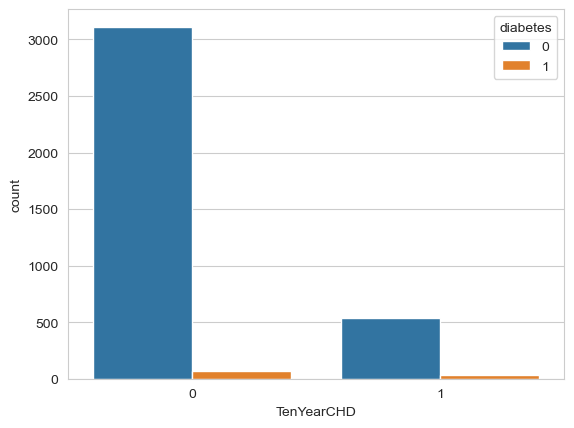

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD', hue='diabetes', data=train)

### Outliers

Die Warnung informiert darüber, dass die Funktion distplot in Seaborn veraltet ist und in zukünftigen Versionen (ab v0.14.0) entfernt wird. Es wird empfohlen, den Code entsprechend anzupassen, um entweder displot für eine figure-level Darstellung oder histplot für eine axes-level Darstellung von Histogrammen zu verwenden. Der bereitgestellte Link bietet eine Anleitung zur Aktualisierung des Codes auf die neuen Funktionen.

C:\Users\ar\AppData\Local\Temp\ipykernel_31200\3350716391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['totChol'])


<Axes: xlabel='totChol', ylabel='Density'>

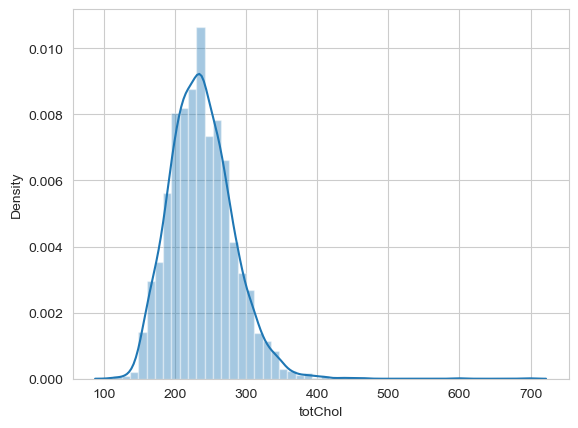

In [31]:
sns.distplot(train['totChol'])

Der Code erstellt einen Boxplot, der die Verteilung der Cholesterinwerte (totChol) im DataFrame train nach der Zielvariable TenYearCHD darstellt.

<Axes: xlabel='TenYearCHD', ylabel='totChol'>

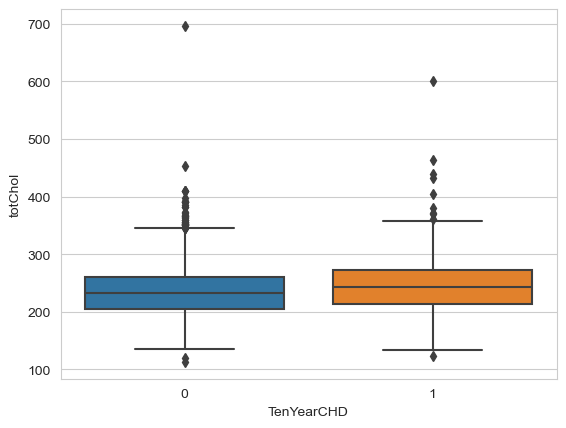

In [32]:
sns.boxplot(y=train['totChol'], x=train['TenYearCHD'])

Der Code berechnet das 99. Perzentil der Cholesterinwerte (totChol) im DataFrame train und speichert den Wert in der Variablen q_totChol.

In [33]:
q_totChol = train['totChol'].quantile(0.99)
q_totChol

352.0

Der Code filtert den DataFrame train so, dass nur die Datensätze beibehalten werden, bei denen der Cholesterinwert (totChol) kleiner als das zuvor berechnete 99. Perzentil (q_totChol) ist.

In [34]:
train = train[train['totChol']<q_totChol]

Die Warnung besagt, dass die Funktion distplot in Seaborn veraltet ist und in zukünftigen Versionen (ab v0.14.0) entfernt wird. Es wird empfohlen, den Code so anzupassen, dass entweder displot für eine figure-level Darstellung oder histplot für eine axes-level Darstellung von Histogrammen verwendet wird. Der bereitgestellte Link bietet eine Anleitung zur Aktualisierung des Codes auf die neuen Funktionen.

C:\Users\ar\AppData\Local\Temp\ipykernel_31200\923562017.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['sysBP'])


<Axes: xlabel='sysBP', ylabel='Density'>

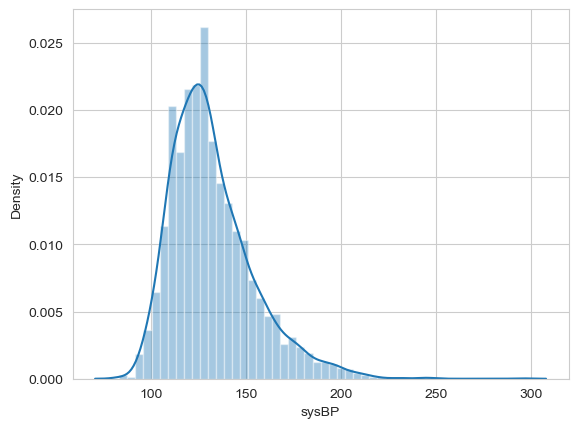

In [35]:
sns.distplot(train['sysBP'])

Der Code erstellt einen Boxplot, der die Verteilung der systolischen Blutdruckwerte (sysBP) im DataFrame train nach der Zielvariable TenYearCHD darstellt.

<Axes: xlabel='TenYearCHD', ylabel='sysBP'>

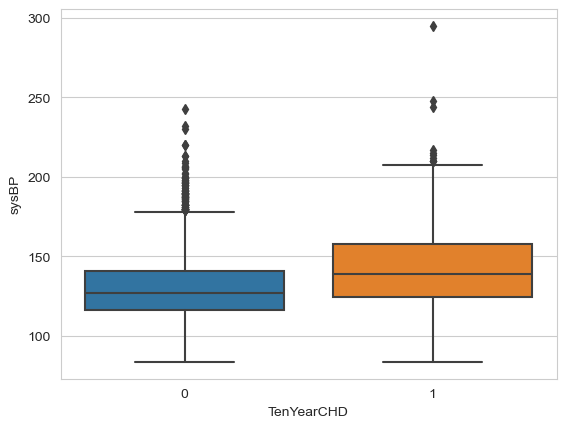

In [36]:
sns.boxplot(y=train['sysBP'], x=train['TenYearCHD'])

Der Code berechnet das 99. Perzentil der systolischen Blutdruckwerte (sysBP) im DataFrame train und speichert den Wert in der Variablen q_sysBP.

In [37]:
q_sysBP = train['sysBP'].quantile(0.99)
q_sysBP

199.95499999999993

Der Code filtert den DataFrame train so, dass nur die Datensätze beibehalten werden, bei denen der systolische Blutdruckwert (sysBP) kleiner als das zuvor berechnete 99. Perzentil (q_sysBP) ist.

In [38]:
train = train[train['sysBP']<q_sysBP]

Die Warnung besagt, dass die Funktion distplot in Seaborn veraltet ist und in zukünftigen Versionen (ab v0.14.0) entfernt wird. Es wird empfohlen, den Code so anzupassen, dass entweder displot für eine figure-level Darstellung oder histplot für eine axes-level Darstellung von Histogrammen verwendet wird. Der bereitgestellte Link bietet eine Anleitung zur Aktualisierung des Codes auf die neuen Funktionen.

C:\Users\ar\AppData\Local\Temp\ipykernel_31200\2539230880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['diaBP'])


<Axes: xlabel='diaBP', ylabel='Density'>

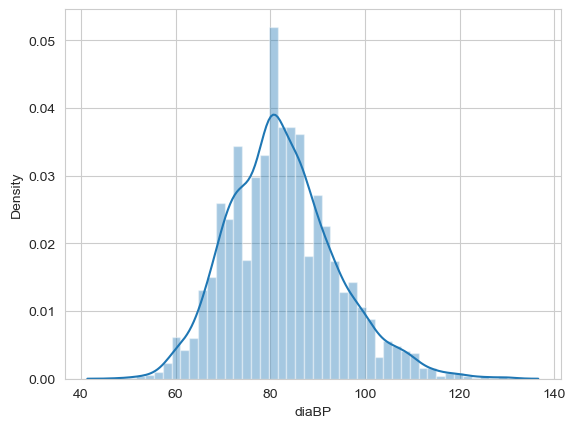

In [39]:
sns.distplot(train['diaBP'])

Der Code erstellt einen Boxplot, der die Verteilung der diastolischen Blutdruckwerte (diaBP) im DataFrame train nach der Zielvariable TenYearCHD darstellt.

<Axes: xlabel='TenYearCHD', ylabel='diaBP'>

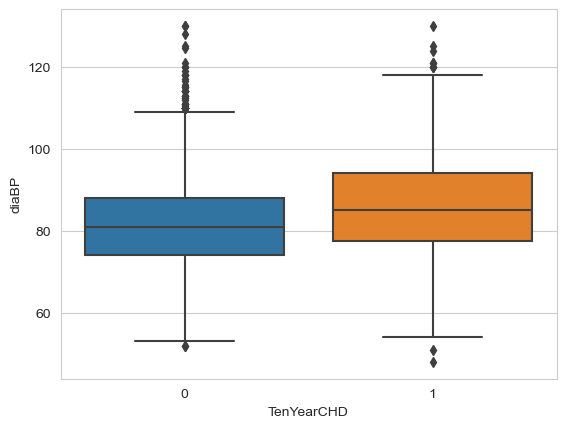

In [40]:
sns.boxplot(y=train['diaBP'], x=train['TenYearCHD'])

Der Code berechnet das 99. Perzentil der diastolischen Blutdruckwerte (diaBP) im DataFrame train und speichert den Wert in der Variablen q_diaBP.

In [41]:
q_diaBP = train['diaBP'].quantile(0.99)
q_diaBP

113.28999999999996

Der Code filtert den DataFrame train so, dass nur die Datensätze beibehalten werden, bei denen der diastolische Blutdruckwert (diaBP) kleiner als das zuvor berechnete 99. Perzentil (q_diaBP) ist.

In [42]:
train = train[train['diaBP']<q_diaBP]

Die Warnung besagt, dass die Funktion distplot in Seaborn veraltet ist und in zukünftigen Versionen (ab v0.14.0) entfernt wird. Es wird empfohlen, den Code so anzupassen, dass entweder displot für eine figure-level Darstellung oder histplot für eine axes-level Darstellung von Histogrammen verwendet wird. Der bereitgestellte Link bietet eine Anleitung zur Aktualisierung des Codes auf die neuen Funktionen.

C:\Users\ar\AppData\Local\Temp\ipykernel_31200\4028512202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

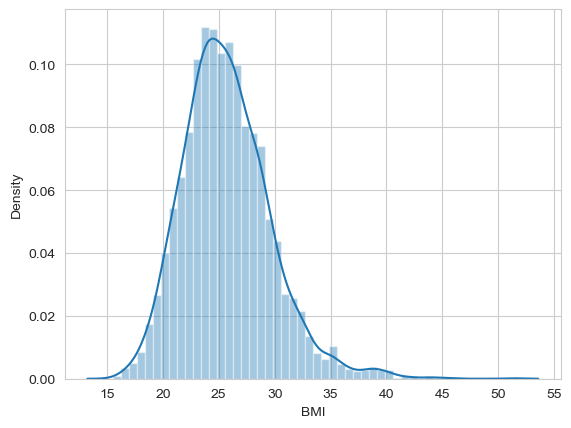

In [43]:
sns.distplot(train['BMI'])

Der auskommentierte Code erstellt einen Boxplot, der die Verteilung des Body-Mass-Index (BMI) im DataFrame train nach der Zielvariable TenYearCHD darstellt. Der zweite Codeausschnitt erstellt einen Boxplot, der nur die Verteilung des BMI im DataFrame train darstellt, ohne Berücksichtigung einer weiteren Variablen wie TenYearCHD.

<Axes: ylabel='BMI'>

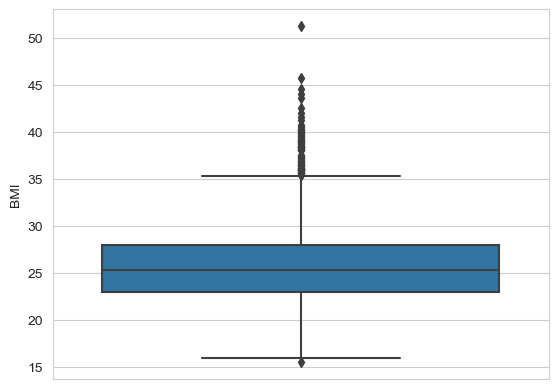

In [44]:
#sns.boxplot(y=train['BMI'], x=train['TenYearCHD'])
sns.boxplot(y=train['BMI'])

Der Code berechnet das 99. Perzentil der Body-Mass-Index (BMI) Werte im DataFrame train und speichert den Wert in der Variablen q_BMI.

In [45]:
q_BMI = train['BMI'].quantile(0.99)
q_BMI

38.26239999999998

Der Code filtert den DataFrame train so, dass nur die Datensätze beibehalten werden, bei denen der Body-Mass-Index (BMI) kleiner als das zuvor berechnete 99. Perzentil (q_BMI) ist.

In [46]:
train = train[train['BMI']<q_BMI]

Die Warnung informiert darüber, dass die Funktion distplot in Seaborn veraltet ist und in zukünftigen Versionen (ab v0.14.0) entfernt wird. Es wird empfohlen, den Code so anzupassen, dass entweder displot für eine figure-level Darstellung oder histplot für eine axes-level Darstellung von Histogrammen verwendet wird. Der bereitgestellte Link bietet eine Anleitung zur Aktualisierung des Codes auf die neuen Funktionen.

C:\Users\ar\AppData\Local\Temp\ipykernel_31200\1667855226.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['heartRate'])


<Axes: xlabel='heartRate', ylabel='Density'>

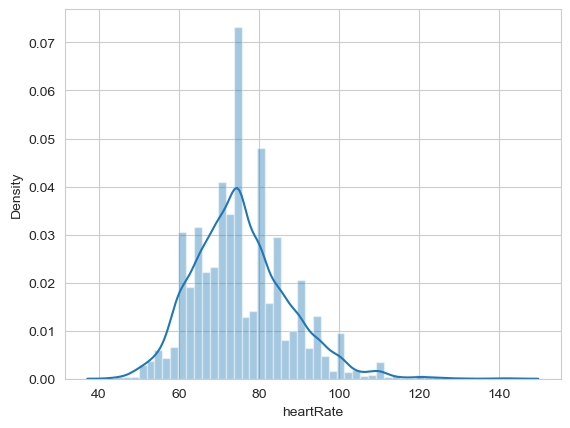

In [47]:
sns.distplot(train['heartRate'])

Der auskommentierte Code würde einen Boxplot erstellen, der die Verteilung der Herzfrequenzwerte (heartRate) im DataFrame train nach der Zielvariable TenYearCHD darstellt. Der zweite Codeausschnitt erstellt einen Boxplot, der nur die Verteilung der Herzfrequenzwerte im DataFrame train darstellt, ohne Berücksichtigung einer weiteren Variablen wie TenYearCHD.

<Axes: ylabel='heartRate'>

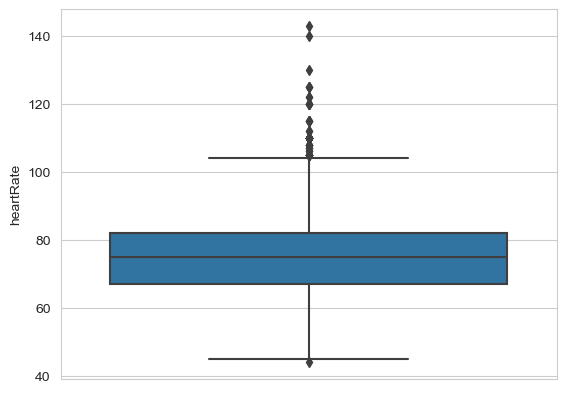

In [48]:
#sns.boxplot(y=train['heartRate'], x=train['TenYearCHD'])
sns.boxplot(y=train['heartRate'])

Der Code berechnet das 99. Perzentil der Herzfrequenzwerte (heartRate) im DataFrame train und speichert den berechneten Wert in der Variablen q_heartRate.

In [49]:
q_heartRate = train['heartRate'].quantile(0.99)
q_heartRate

110.0

Der Code filtert den DataFrame train so, dass nur die Datensätze beibehalten werden, bei denen die Herzfrequenzwerte (heartRate) kleiner sind als das zuvor berechnete 99. Perzentil (q_heartRate).

In [50]:
train = train[train['heartRate']<q_heartRate]

Die Warnung besagt, dass die Funktion distplot in Seaborn veraltet ist und in zukünftigen Versionen (ab v0.14.0) entfernt wird. Es wird empfohlen, den Code so anzupassen, dass entweder displot für eine figure-level Darstellung oder histplot für eine axes-level Darstellung von Histogrammen verwendet wird. Der bereitgestellte Link bietet eine Anleitung zur Aktualisierung des Codes auf die neuen Funktionen.

C:\Users\ar\AppData\Local\Temp\ipykernel_31200\734497608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['glucose'])


<Axes: xlabel='glucose', ylabel='Density'>

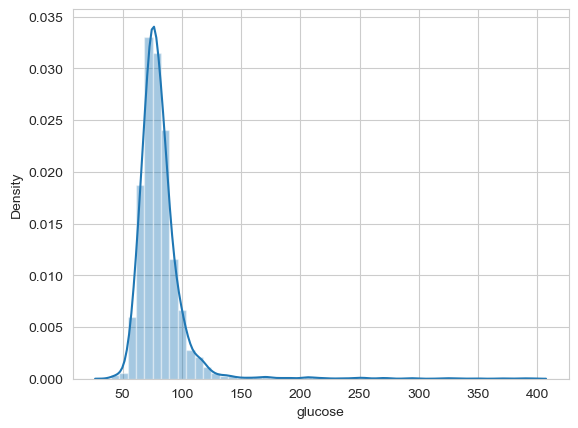

In [51]:
sns.distplot(train['glucose'])

Der Code würde einen Boxplot erstellen, der die Verteilung der Glukosewerte (glucose) im DataFrame train nach der Zielvariable TenYearCHD darstellt. Der zweite Codeausschnitt erstellt einen Boxplot, der nur die Verteilung der Glukosewerte im DataFrame train darstellt, ohne Berücksichtigung einer weiteren Variablen wie TenYearCHD.

<Axes: xlabel='glucose'>

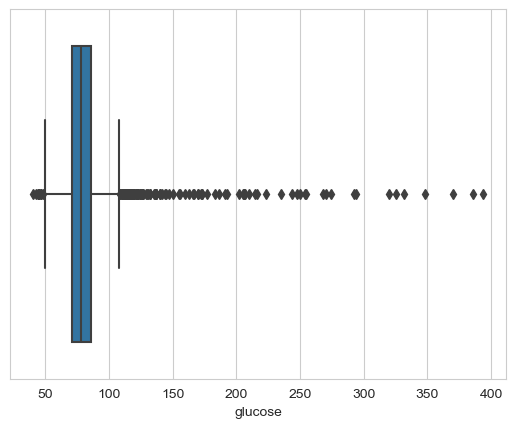

In [ ]:
#sns.boxplot(y=train['glucose'], x=train['TenYearCHD'])
sns.boxplot(x=train['glucose'])

Der Code berechnet das 97. Perzentil der Glukosewerte (glucose) im DataFrame train und speichert den berechneten Wert in der Variablen q_glucose.

In [53]:
q_glucose = train['glucose'].quantile(0.97)
q_glucose

117.0

Der Code filtert den DataFrame train so, dass nur die Datensätze beibehalten werden, bei denen die Glukosewerte (glucose) kleiner sind als das zuvor berechnete 97. Perzentil (q_glucose).

In [54]:
train = train[train['glucose']<q_glucose]

Der Code erstellt einen Boxplot, der die Verteilung der Glukosewerte (glucose) im DataFrame train darstellt.

<Axes: xlabel='glucose'>

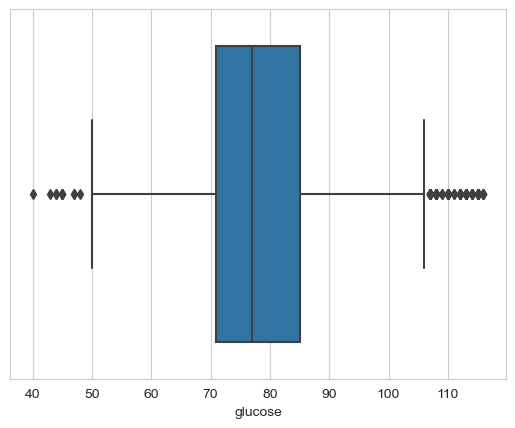

In [55]:
sns.boxplot(x=train['glucose'])

In [56]:
#sns.pairplot(train)

### Checking for Multicollinarity

Mit der Importanweisung from statsmodels.stats.outliers_influence import variance_inflation_factor wird die Funktion variance_inflation_factor aus dem Modul outliers_influence in statsmodels.stats importiert. Diese Funktion wird verwendet, um den Variance Inflation Factor (VIF) zu berechnen, der zur Diagnose von Multikollinearität in Regressionsmodellen verwendet wird.

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Der Code erstellt ein neues DataFrame vif, das den Variance Inflation Factor (VIF) für jede Variable im DataFrame train, ausgenommen der Zielvariable TenYearCHD, berechnet. Der VIF wird mithilfe der Funktion variance_inflation_factor aus dem Modul statsmodels.stats.outliers_influence für jede Variable einzeln berechnet und zusammen mit den Variablennamen in vif gespeichert, um die Ergebnisse leichter erkunden zu können.

In [58]:
# Create a new data frame which includes all VIFs (Variance Inflation Factor)
# Each variable has its own variance inflation factor. This measure is variable specific
variables = train.drop(['TenYearCHD'], axis = 1)
vif = pd.DataFrame()

# Make use of the variance_inflation_factor module, output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Include variable names so it is easier to explore the result
vif["Features"] = variables.columns

In [59]:
vif

VIF         Features
0     2.217100             male
1    42.056992              age
2     4.959553    currentSmoker
3     4.287163       cigsPerDay
4     1.118613           BPMeds
5     1.019975  prevalentStroke
6     2.240536     prevalentHyp
7     1.023187         diabetes
8    37.313994          totChol
9   153.968224            sysBP
10  147.331914            diaBP
11   54.537909              BMI
12   45.298946        heartRate
13   41.248874          glucose

Der Code erstellt eine Heatmap der Korrelationsmatrix für die Variablen im DataFrame train, wobei die Größe der Abbildung auf 12x8 Zoll festgelegt ist. Die Heatmap zeigt die Korrelationen zwischen den Variablen, einschließlich spezifischer Anmerkungen zu Korrelationen wie zwischen currentSmoker und cigsPerDay, sysBP und diaBP, sowie prevalentHyp und sysBP und diaBP.

<Axes: >

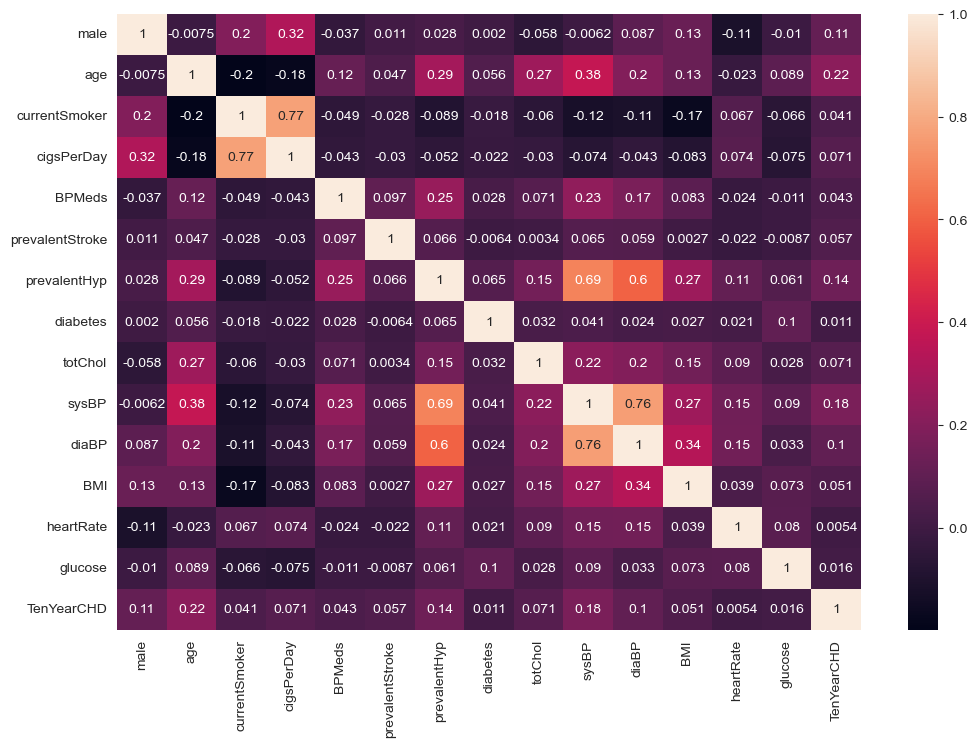

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True)
#Korrelationen zwischen currentSmoker und cigsPerDay, sysBPund diaBP, prevalentHyp und sysBP und diaBP 

Der Code setzt den Index des DataFrame train zurück und erstellt eine Kopie davon, wobei der ursprüngliche Index verworfen wird.

In [61]:
train = train.reset_index(drop=True).copy()

## 4.Modeling

In diesem Abschnitt wird die Feature-Liste estimators definiert, die die relevanten Merkmale für die Modellierung mittels logistischer Regression enthält. Diese Merkmale werden aus dem DataFrame train ausgewählt und der Variablen X_all zugewiesen, während die Zielvariablen y aus dem gleichen DataFrame extrahiert werden. Dabei wurden die Merkmale currentSmoker und sysBP (siehe oben) aus der endgültigen Merkmalsliste entfernt, um die Genauigkeit des Modells zu verbessern.

Der Code definiert die Feature-Liste bestimators, wählt die entsprechenden Merkmale aus dem DataFrame train aus und weist sie der Variablen X_all zu. Zudem werden die Zielvariablen y aus dem DataFrame train extrahiert.

In [62]:
estimators = ['male', 'age', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']
X_all = train[estimators]
y = train['TenYearCHD']
#currentSmoker & sysBP werden gedropt (siehe oben)

Die Importanweisung import statsmodels.api as sm importiert das Modul statsmodels unter dem Alias sm, das für statistische Modellierung und Tests verwendet wird.

In [63]:
import statsmodels.api as sm

Der Code führt eine logistische Regression auf den Daten X_all mit der Zielvariable y aus und gibt eine Zusammenfassung der Ergebnisse der Regression zurück, einschließlich statistischer Kennzahlen wie Koeffizienten, p-Werte und Konfidenzintervalle der geschätzten Koeffizienten.

In [64]:
x = sm.add_constant(X_all)
reg_logit = sm.Logit(y,x)
results_logit = reg_logit.fit()
results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.356399
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3444
Model:                          Logit   Df Residuals:                     3431
Method:                           MLE   Df Model:                           12
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  0.1008
Time:                        14:23:53   Log-Likelihood:                -1227.4
converged:                       True   LL-Null:                       -1365.0
Covariance Type:            nonrobust   LLR p-value:                 7.410e-52
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3986      0.805    -10.431      0.000      -9.977      -6.821
male                0.6638      0.112      5.943      0.000       0.445       0.883
age                 0.0703      0.007     10.266      0.000       0.057       0.084
currentSmoker       0.4561      0.113      4.031      0.000       0.234       0.678
BPMeds             -0.1249      0.293     -0.427      0.670      -0.699       0.449
prevalentStroke     1.0221      0.540      1.892      0.058      -0.037       2.081
prevalentHyp        0.1340      0.150      0.893      0.372      -0.160       0.428
diabetes           -0.0543      0.515     -0.106      0.916      -1.063       0.954
totChol             0.0020      0.001      1.468      0.142      -0.001       0.005
sysBP               0.0138      0.004      3.760      0.000       0.007       0.021
BMI                 0.0029      0.015      0.187      0.852      -0.027       0.033
heartRate       -6.527e-05      0.005     -0.013      0.989      -0.010       0.009
glucose            -0.0009      0.004     -0.196      0.845      -0.009       0.008
===================================================================================
"""

In [65]:
# Der P-Wert bei folgenden Attributen: BPMeds, prevalentStroke, diabetes, totChol,diaBP,BMI,heartRate & glucose
#ist relativ hoch und somit weißt es eine geringe statistiche signifikante Beziehung zur Wahrscheinlichkeit einer Herzerkrankung auf
#(The closer to 0.000 the p-value, the better, Slides_AI - Part 4-2.pdf, S.27)

Der Code berechnet die Odds Ratios und deren Konfidenzintervalle für die Koeffizienten der logistischen Regressionsergebnisse und gibt sie als DataFrame aus, wobei die exponentiellen Transformation der Konfidenzintervalle und des Koeffizienten der Odds Ratio angewendet wird.

In [66]:
#Odds ratio & confidence intervals
params = results_logit.params
conf = results_logit.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                       5%       95%  Odds Ratio
const            0.000046  0.001091    0.000225
male             1.560329  2.417551    1.942209
age              1.058495  1.087278    1.072790
currentSmoker    1.264052  1.969618    1.577878
BPMeds           0.497151  1.566804    0.882575
prevalentStroke  0.964058  8.010118    2.778888
prevalentHyp     0.851976  1.534411    1.143364
diabetes         0.345451  2.596858    0.947147
totChol          0.999340  1.004611    1.001972
sysBP            1.006617  1.021175    1.013870
BMI              0.972975  1.033720    1.002888
heartRate        0.990448  1.009513    0.999935
glucose          0.990579  1.007774    0.999140


Der Code entfernt bestimmte Variablen ('BPMeds', 'prevalentStroke', 'diabetes', 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose') aus dem DataFrame x und speichert das Ergebnis in x_new.

In [67]:
#x_new = x.drop(['BPMeds', 'prevalentStroke', 'diabetes', 'totChol','diaBP','BMI','heartRate', 'glucose'], axis=1)

Der Code entfernt die Spalten 'BPMeds', 'prevalentStroke', 'diabetes', 'totChol', 'diaBP', 'BMI', 'heartRate' und 'glucose' aus dem DataFrame train.

In [68]:
#train = train.drop(['BPMeds', 'prevalentStroke', 'diabetes', 'totChol','diaBP','BMI','heartRate', 'glucose'], axis=1)

Der Code fügt eine konstante Spalte zu x_new hinzu, führt eine logistische Regression durch und gibt eine Zusammenfassung der Regressionsergebnisse aus.

In [69]:
#x = sm.add_constant(x_new)
#reg_logit = sm.Logit(y,x)
#results_logit = reg_logit.fit()
#results_logit.summary()

Der Code berechnet die Odds Ratio und die Konfidenzintervalle für die Regressionskoeffizienten der logistischen Regression und gibt sie exponentiell transformiert aus.

In [70]:
#Odds ratio & confidence intervals
#params = results_logit.params
#conf = results_logit.conf_int()
#conf['Odds Ratio'] = params
#conf.columns = ['5%', '95%', 'Odds Ratio']
#print(np.exp(conf))

### Model Training

In [71]:
train.shape

(3444, 15)

In [72]:
X = x
y = y

### Undersampling (nachträglich) 

Der Code gibt die Versionen der Bibliotheken scikit-learn (sklearn) und imbalanced-learn (imblearn) aus, die in der Umgebung installiert sind.

In [73]:
print(sklearn.__version__)
print(imblearn.__version__)

1.5.0
0.12.3


Dieser Code importiert die Bibliothek imblearn, speziell das Modul InstanceHardnessThreshold für das Unterdampling und die LogisticRegression aus scikit-learn für die logistische Regression.

In [74]:
import imblearn
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.linear_model import LogisticRegression

Der Code führt das Verfahren des Instance Hardness Threshold (IHT) für das Unterdampling durch. Dabei wird ein Modell der logistischen Regression (mit bestimmten Parametern wie solver='lbfgs' und multi_class='auto') verwendet, um die Instanzen zu bewerten und diejenigen zu entfernen, die schwer klassifizierbar sind, um das Ungleichgewicht in den Klassen zu reduzieren (fit_resample).

In [75]:
iht = InstanceHardnessThreshold(random_state=0,estimator=LogisticRegression (solver='lbfgs', multi_class='auto'))
                               
X_resampled, y_resampled = iht.fit_resample(X, y)

C:\Users\ar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

Der Code importiert die Funktion train_test_split aus Scikit-Learn, die verwendet wird, um Datensätze in Trainings- und Testsets aufzuteilen.

In [76]:
from sklearn.model_selection import train_test_split

Der Code verwendet die Methode train_test_split aus Scikit-Learn, um die Datensätze X_resampled und y_resampled in Trainings- und Testsets aufzuteilen, wobei 20% der Daten für das Testset reserviert werden.

In [77]:
#Methode von train_test_split (sklearn)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#der Datensatz wird übergeben ohne die Zielspalte TenYearCHD für X, dafür wird diese in y eingesetzt
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=365)

#### Scaling

Der Code importiert die StandardScaler-Klasse aus Scikit-Learn, die zur Skalierung von Merkmalen verwendet wird, um sicherzustellen, dass sie eine Nullmittelwert und eine Einheitsvarianz haben.

In [78]:
from sklearn.preprocessing import StandardScaler

Der Code führt eine Standardisierung der Trainingsdaten (X_train) und Testdaten (X_test) mithilfe eines StandardScaler durch, wobei die Daten so transformiert werden, dass sie eine Nullmittelwert und eine Einheitsvarianz haben, basierend auf den statistischen Eigenschaften der Trainingsdaten.

In [79]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistische Regression

Der Code importiert die LogisticRegression Klasse aus sklearn.linear_model, die für die Logistische Regression zur Klassifikation verwendet wird.

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
# Ein model wird angelegt
log_model = LogisticRegression(random_state=0)

In [82]:
#Trainiere und fitten einer logistisches Regressionsmodell auf das Trainigsset
log_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

Der Code importiert die classification_report Funktion aus sklearn.metrics, die zur Ausgabe eines Klassifikationsberichts für die Modellleistung verwendet wird, einschließlich Präzision, Recall, F1-Score und Unterstützung für jede Klasse.

In [83]:
from sklearn.metrics import classification_report

In [84]:
#Precision= True positive / true positive + false positive 
#Recall = True positive / true positive + false negative
#f1-score = zusammenfassung von der precision und dem recall
#accuracy(genauigkeit) liegt bei 0.86 - also 86%
print('train performance')
print(classification_report(y_train, log_model.predict(X_train)))
print('test performance')
print(classification_report(y_test, log_model.predict(X_test)))
#Bei der logistischen Regression sind die Trainings- und Testleistung sehr ähnlich.
# erstellte Modell kann auf neuen Daten gut verallgemeinert werden kann.

train performance
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       365
           1       0.99      0.93      0.96       380

    accuracy                           0.96       745
   macro avg       0.96      0.96      0.96       745
weighted avg       0.96      0.96      0.96       745

test performance
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       101
           1       0.99      0.94      0.96        86

    accuracy                           0.97       187
   macro avg       0.97      0.97      0.97       187
weighted avg       0.97      0.97      0.97       187



In [85]:
#Die Confusion Matrix zeigt eine Zusammenfassung der Vorhersageergebnisse zu dem Klassifizierungsproblem 
from sklearn.metrics import confusion_matrix

Der Code druckt die Verwechselungsmatrix aus, die die Leistung eines Klassifikationsmodells, insbesondere einer logistischen Regression (log_model), durch den Vergleich der vorhergesagten Werte (log_model.predict(X_test)) mit den tatsächlichen Werten (y_test) zeigt.

In [86]:
print(confusion_matrix(y_test, log_model.predict(X_test)))
#

[[100   1]
 [  5  81]]


### Decision Tree

In [87]:
#from sklearn.tree import DecisionTreeClassifier
# overfitting

In [88]:
#tree = DecisionTreeClassifier()
#tree.fit(X_train, y_train)

In [89]:
#confusion_matrix(y_test, tree.predict(X_test)) #true negatives, false positives, false negatives, true positives

In [90]:
#from sklearn.metrics import classification_report


In [91]:
#print(classification_report(y_train, tree.predict(X_train)))

In [92]:
#print(classification_report(y_test, tree.predict(X_test)))

### Random forest 

In [93]:
#from sklearn.ensemble import RandomForestClassifier
# overfitting

In [94]:
#rf = RandomForestClassifier()
#rf.fit(X_train, y_train)

In [95]:
#confusion_matrix(y_test, rf.predict(X_test))

In [96]:
#print(classification_report(y_train, rf.predict(X_train)))

In [97]:
#print(classification_report(y_test, rf.predict(X_test)))

## 5.Evaluation 


Das Unternehmen in der Medizinbranche strebt danach, das Risiko für die Entwicklung einer koronaren Herzkrankheit (KHK) mithilfe verschiedener demografischer, verhaltensbezogener und medizinischer Faktoren zu bestimmen. Durch diese Risikovorhersage sollen rechtzeitig Maßnahmen ergriffen werden, um die Krankheit idealerweise zu verhindern und die langfristige Gesundheit der Patienten zu verbessern.

## 6.Deployment 


Das Unternehmen in der Medizinbranche strebt danach, das Risiko für die Entwicklung einer koronaren Herzkrankheit (KHK) basierend auf verschiedenen demografischen, verhaltensbezogenen und medizinischen Faktoren zu bestimmen. Mit dieser Risikovorhersage können frühzeitige Maßnahmen ergriffen werden, um die Krankheit im besten Fall zu verhindern und die langfristige Gesundheit der Patienten zu verbessern. Die Implementierung dieser Analyse könnte potenziell zur Verbesserung der öffentlichen Gesundheit beitragen, indem sie präventive Strategien fördert und die Behandlung von Risikopersonen priorisiert.